### ✅Step 1: Load and Explore AG News Dataset

In [1]:
import pandas as pd

Dataset's link -> https://www.kaggle.com/datasets/amananandrai/ag-news-classification-dataset

In [2]:
train_df = pd.read_csv(r"C:\Users\moham\OneDrive\Desktop\Courses\Elevvo Internship\News Category Classification\Data\train.csv")
test_df = pd.read_csv(r"C:\Users\moham\OneDrive\Desktop\Courses\Elevvo Internship\News Category Classification\Data\test.csv")

In [3]:
train_df.head()

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [4]:
train_df["Text"] = train_df["Title"].fillna('') + " " + train_df["Description"].fillna('')
test_df["Text"] = test_df["Title"].fillna('') + " " + test_df["Description"].fillna('')

In [5]:
train_df.head()

,Class Index,Title,Description,Text
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",Wall St. Bears Claw Back Into the Black (Reute...
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,Carlyle Looks Toward Commercial Aerospace (Reu...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,Oil and Economy Cloud Stocks' Outlook (Reuters...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,Iraq Halts Oil Exports from Main Southern Pipe...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...","Oil prices soar to all-time record, posing new..."


In [6]:
train_df['Class Index'].value_counts()

Class Index
3    30000
4    30000
2    30000
1    30000
Name: count, dtype: int64

### ✅ Step 2: Preprocess the Text

In [7]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [8]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

In [10]:
def preprocess(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)                  # remove HTML tags
    text = re.sub(r'[^a-z\s]', '', text)               # remove numbers and punctuation
    words = [stemmer.stem(w) for w in text.split() if w not in stop_words]
    return " ".join(words)

In [11]:
train_df["Clean_Text"] = train_df["Text"].apply(preprocess)
test_df["Clean_Text"] = test_df["Text"].apply(preprocess)

In [12]:
train_df[["Text", "Clean_Text"]].head()

,Text,Clean_Text
0,Wall St. Bears Claw Back Into the Black (Reute...,wall st bear claw back black reuter reuter sho...
1,Carlyle Looks Toward Commercial Aerospace (Reu...,carlyl look toward commerci aerospac reuter re...
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,oil economi cloud stock outlook reuter reuter ...
3,Iraq Halts Oil Exports from Main Southern Pipe...,iraq halt oil export main southern pipelin reu...
4,"Oil prices soar to all-time record, posing new...",oil price soar alltim record pose new menac us...


### ✅ Step 3: TF-IDF Vectorization

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
# Use unigrams and bigrams
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))

In [15]:
X_train = vectorizer.fit_transform(train_df["Clean_Text"])
X_test = vectorizer.transform(test_df["Clean_Text"])

In [16]:
y_train = train_df["Class Index"]
y_test = test_df["Class Index"]

In [17]:
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (120000, 10000)
Test shape: (7600, 10000)


### ✅ Step 4: Train & Evaluate

##### Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [19]:
clf = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
clf.fit(X_train, y_train)

c:\Users\moham\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [20]:
y_pred = clf.predict(X_test)

In [21]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9125

Classification Report:
               precision    recall  f1-score   support

           1       0.93      0.90      0.92      1900
           2       0.95      0.98      0.96      1900
           3       0.88      0.88      0.88      1900
           4       0.88      0.89      0.89      1900

    accuracy                           0.91      7600
   macro avg       0.91      0.91      0.91      7600
weighted avg       0.91      0.91      0.91      7600



In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

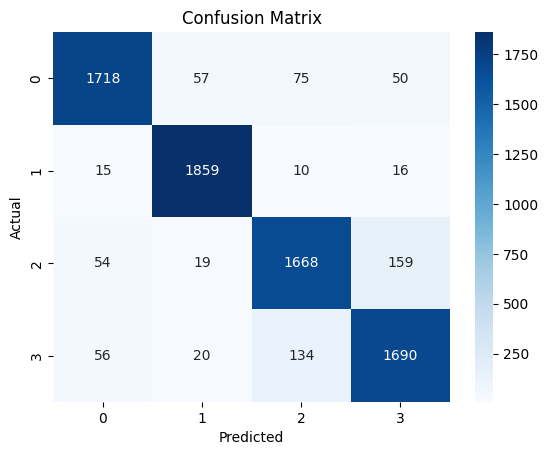

In [23]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

##### SVM (Support Vector Machine)

In [24]:
from sklearn.svm import LinearSVC

In [25]:
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

LinearSVC()

In [26]:
svm_preds = svm_model.predict(X_test)

In [27]:
print("SVM Accuracy:", accuracy_score(y_test, svm_preds))
print("\nSVM Classification Report:\n", classification_report(y_test, svm_preds))

SVM Accuracy: 0.9140789473684211

SVM Classification Report:
               precision    recall  f1-score   support

           1       0.93      0.91      0.92      1900
           2       0.95      0.98      0.97      1900
           3       0.89      0.88      0.88      1900
           4       0.89      0.90      0.89      1900

    accuracy                           0.91      7600
   macro avg       0.91      0.91      0.91      7600
weighted avg       0.91      0.91      0.91      7600



##### Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=7)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [30]:
rf_preds = rf_model.predict(X_test)


In [31]:
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, rf_preds))

Random Forest Accuracy: 0.8922368421052631

Random Forest Classification Report:
               precision    recall  f1-score   support

           1       0.92      0.89      0.90      1900
           2       0.92      0.97      0.95      1900
           3       0.86      0.85      0.86      1900
           4       0.87      0.85      0.86      1900

    accuracy                           0.89      7600
   macro avg       0.89      0.89      0.89      7600
weighted avg       0.89      0.89      0.89      7600

